<a href="https://colab.research.google.com/github/vilijajoyce/python-resources/blob/main/python_lake_011_compare_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing one or two means
## Datasets
https://cims.nyu.edu/~brenden/courses/labincp/data/

## One-sample z test
Almost never used IRL.

Requires normality, independence, known SD (in no real world data anslysis problem do you know the SD).

In [16]:
from IPython.core.display import HTML, Markdown, display

import numpy.random as npr
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
#from cycler import cycler
import matplotlib.pyplot as plt
import scipy.stats as stats
#import statsmodels.formula.api as smf
import ipywidgets as widgets
# from matplotlib.patches import Polygon
# from matplotlib.gridspec import GridSpec

!pip install myst_nb
from myst_nb import glue # for the Jupyter book chapter

# Average grade in Zeppo's class is 67.5
# Here is a subset of that population - just the psych students
zeppo_df=pd.read_csv('/content/zeppo.csv')
zeppo_df.columns=["grades"]
zeppo_df.grades

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 3.3 MB/s 
     |████████████████████████████████| 3.1 MB 11.6 MB/s 
     |████████████████████████████████| 57 kB 5.8 MB/s 
     |████████████████████████████████| 70 kB 7.4 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 132 kB 50.6 MB/s 
     |████████████████████████████████| 428 kB 53.0 MB/s 
     |████████████████████████████████| 100 kB 10.2 MB/s 
     |████████████████████████████████| 121 kB 65.2 MB/s 
     |████████████████████████████████| 90 kB 9.8 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jupyter-client
    Found existing insta

0     60
1     60
2     64
3     66
4     66
5     67
6     69
7     70
8     74
9     76
10    76
11    77
12    79
13    79
14    79
15    81
16    82
17    82
18    89
Name: grades, dtype: int64

In [6]:
# Calculate mean for psych students - appears to be higher than average, but perhaps just by chance
zeppo_df.grades.mean()

73.47368421052632

NameError: ignored

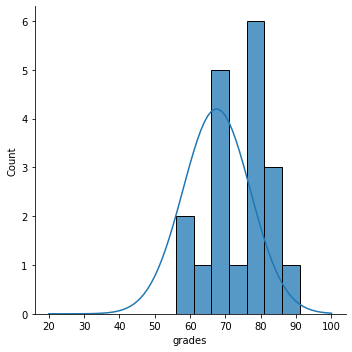

In [12]:
# Hypothesized population mean of 67.5 with pop SD 9.5
sns_fig=sns.displot(zeppo_df.grades,bins=np.arange(31,101,5),kde=False)

x=np.arange(20,101)
y=stats.norm.pdf(x,67.5,9.5)
plt.plot(x,y*100)  # just for display purposes scaling the size of the normal distribution
#plt.show()

glue("zeppo_fig",sns_fig.fig,display=False)

## Constructing the hypothesis test
Null H0: True population mean for psych student grades is 67.5

Alt H1:  Not 67.5

Psych grades are normally distributed and true SD is 9.5.



NameError: ignored

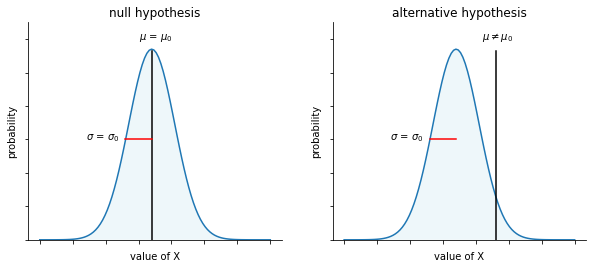

In [14]:
# Graphical illustration of the null and alternative hypotheses assumed by the one sample $z$-test (the two sided version, that is). 
# The null and alternative hypotheses both assume that the population distribution is normal, and additionally assumes that the 
# population standard deviation is known (fixed at some value $\\sigma_0$). The null hypothesis (left) is that the population mean $\mu$ is 
#equal to some specified value $\mu_0$. The alternative hypothesis is that the population mean differs from this value, $\mu \neq \mu_0$.

fig, ax = plt.subplots(1,2,figsize=(10,4))


x = np.linspace(-5,30,100)
x2 = np.linspace(-5,30,100)
y=stats.norm.pdf(x, 12,3.5)
y2=stats.norm.pdf(x2,15,3.5)

ax[0].plot(x,y)
ax[0].set_ylabel("probability")
ax[0].set_xlabel("value of X")
ax[0].set_title("null hypothesis")
ax[0].set_ylim(0,0.13)
ax[0].fill_between(x,y, where=y>0.0,interpolate=True,facecolor='lightblue',alpha=0.2)
ax[0].plot([12,12],[0,0.113],color='k')
ax[0].plot([8,12],[0.06,0.06],color='r')
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].annotate("$\sigma$ = $\sigma_0$", xy=(2,0.06),xytext=(2,0.06))
ax[0].annotate("$\mu$ = $\mu_0$", xy=(10,0.12),xytext=(10,0.12))





ax[1].plot(x,y)
ax[1].set_ylabel("probability")
ax[1].set_xlabel("value of X")
ax[1].set_title("alternative hypothesis")
ax[1].set_ylim(0,0.13)
ax[1].fill_between(x,y, where=y>0.0,interpolate=True,facecolor='lightblue',alpha=0.2)
ax[1].plot([8,12],[0.06,0.06],color='r')
ax[1].plot([18,18],[0,0.113],color='k')
ax[1].annotate("$\sigma$ = $\sigma_0$", xy=(2,0.06),xytext=(2,0.06))
ax[1].annotate("$\mu \\neq \mu_0$", xy=(16,0.12),xytext=(16,0.12))
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

sns.despine(top=True, right=True)

#plt.show()
glue("ztest_hypo_fig",fig,display=False)

Look at difference between sample mean and the value the null hypothesis predicts.

Z-statistic: equal to the number of SEs that separate hte observed sample mean from the pop mean predicted by the null hypothesis.

NameError: ignored

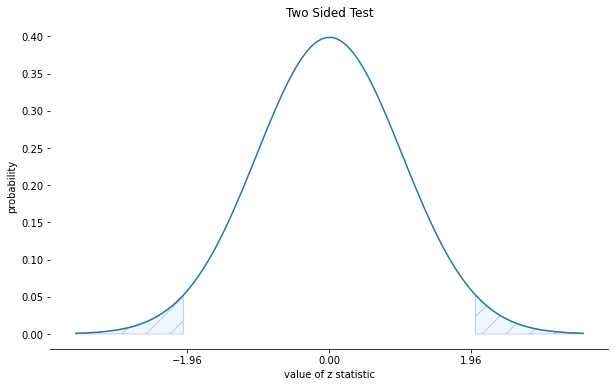

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
x=np.linspace(-3.5,3.5,100)
y=stats.norm.pdf(x,0,1.0)

ax.plot(x,y)
ax.set_ylabel("probability")
ax.set_xlabel("value of z statistic")
ax.set_title("Two Sided Test")
#ax.set_ylim(0,0.5)
#ax.set_xlim(-3,3)
ax.fill_between(x,y,where=x<-1.96,interpolate=True,facecolor='lightblue',alpha=0.2,hatch='/',edgecolor='b')
ax.fill_between(x,y,where=x>1.96,interpolate=True,facecolor='lightblue',alpha=0.2,hatch='/',edgecolor='b')
ax.set_xticks([-1.96, 0, 1.96])
#ax.set_yticklabels([])


sns.despine(top=True, right=True, left=True)

#plt.show()
glue("ztest_twoside_fig",fig,display=False)

In [16]:
# Worked example using Python
# Mean of grades data
zeppo_df=pd.read_csv('/content/zeppo.csv')
zeppo_df.columns=["grades"]
sample_mean = zeppo_df.grades.mean()
print(sample_mean)

73.47368421052632


In [17]:
# Create vars corresponding to know pop mean and SD
mu_null = 67.5
sd_true = 9.5
# Create variable for sample size
N = len( zeppo_df.grades )
print( N )

19


In [18]:
# Calculate true standard error of the mean
sem_true = sd_true / np.sqrt(N)
print(sem_true)

2.1794494717703365


In [20]:
# Calculate z-score
z_score = (sample_mean - mu_null)/sem_true
print(z_score)

2.740914294137764


In [25]:
# Get p-value
upper_area = 1.0-stats.norm.cdf(z_score)
print(upper_area)
lower_area = stats.norm.cdf(-z_score)
print(lower_area)
p_value = lower_area+upper_area
print(p_value)

0.003063424338282439
0.003063424338282457
0.006126848676564896


## One-sample $t$-test
Raw data gives an estimate of the population SD. Student's t-test orginated from Gosset - a chemist working at the Guinness brewery who published under a pseudonym. 

Instead of true SD, use our estimate of SD. 

Sampling distribution = $t$-distribution. Has heavier tails, but as degrees of freedom get larger, $t$-distribution looks identical to standard normal distribution. For large $N$, the $t$-test behaves exactly the same as a $z$-test.

Requires normality and independence.

In [26]:
zeppo_df['grades'].std(ddof=1)

8.16066732737404

In [1]:
!pip install pingouin --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pingouin as pg

In [7]:
pg.ttest(x=zeppo_df.grades, y=67.5)
# Left to right-->T-statistic (3.19), degrees of freedom (1 less than the number of obs or 18), 
# two-sided test, p-value of 0.005 (null rejected), CI around mean,  
# estimate effect size (cohen's d is0.73), Bayes Factor, pos-hoc power
# With a mean grade of 73.5, the psych students scored slightly higher than the average
# grade of 67.5(t(18)=3.19, p<0.01

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.190754,18,two-sided,0.005064,"[69.54, 77.41]",0.732009,9.203,0.854662


# Independent samples $t$-test (Student test)
Two different groups of observations - do the 2 groups have the same pop mean?

Requires normality, independence, homogeneity of variance (pop SD is the same in both groups)

In [11]:
# Who's the better tutor - Anastasia or Bernadette?
harpo_df=pd.read_csv('/content/harpo.csv',index_col=0)
harpo_df.head() #Show first 5 rows

,grade,tutor
1,65,Anastasia
2,72,Bernadette
3,66,Bernadette
4,74,Anastasia
5,73,Anastasia


In [12]:
# Calculate mean and SD by tutor
harpo_df.groupby('tutor').describe()

grade                                                    
           count       mean       std   min    25%   50%   75%   max
tutor                                                               
Anastasia   15.0  74.533333  8.998942  55.0  69.00  76.0  79.0  90.0
Bernadette  18.0  69.055556  5.774918  56.0  66.25  69.0  73.0  79.0

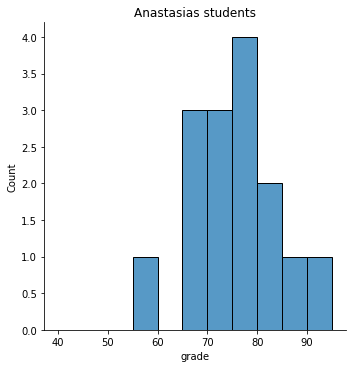

In [17]:
# Plot histograms showing distribution of grades for both tutors
p1=sns.displot(harpo_df[harpo_df['tutor']=="Anastasia"].grade,bins=np.arange(40,100,5))
p1.ax.set_title("Anastasias students")
glue("anastasia_fig",p1.fig,display=False)

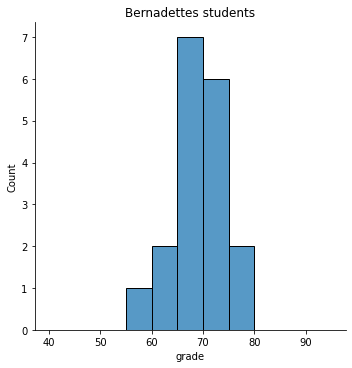

In [18]:
p1=sns.displot(harpo_df[harpo_df['tutor']=="Bernadette"].grade,bins=np.arange(40,100,5))
p1.ax.set_title("Bernadettes students")
glue("bernadette_fig",p1.fig,display=False)

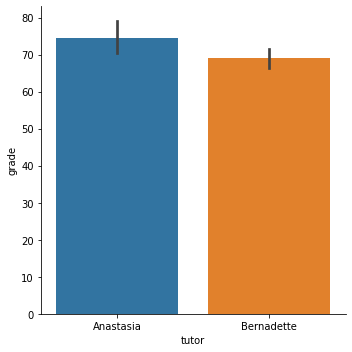

In [19]:
# Alternative simpler plot
p1=sns.catplot(x="tutor", y="grade", data=harpo_df, kind='bar', ci=95)
glue("tutors_fig",p1.fig,display=False)

In [24]:
# Independent samples t-test (Student's)
anas_group = harpo_df[harpo_df['tutor']=="Anastasia"].grade
bern_group = harpo_df[harpo_df['tutor']=="Bernadette"].grade
pg.ttest(x=bern_group, y=anas_group, correction=False).round(2)
# The mean grade in Anastasia's class was 74.5 (SD 9) while in Bernadette's class the mean was 69.1 (SD 5.8). 
# A Student's independent sample t-test showed that this 5.4 point difference was significant
# (t(31)=2.1, p<0.05, CI(95)=0.2,10.8, Cohen's d=.74)
# Don't worry about positive and negative t-values

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.12,31,two-sided,0.04,"[-10.76, -0.2]",0.74,1.755,0.54


In [27]:
anas_group.mean(), bern_group.mean()

(74.53333333333333, 69.05555555555556)

In [29]:
anas_group.std(), bern_group.std()

(8.998941736723957, 5.774917592711985)

# Independent samples $t$-test (Welch test)
Two different groups of observations - do the 2 groups have the same pop mean?

In contrast to Student's, does not require homogenity of variance assumption.

In [31]:
# Independent samples t-test (Welch)
pg.ttest(x=bern_group, y=anas_group, correction=True).round(3)
# Note - no longer significant

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.034,23.025,two-sided,0.054,"[-11.05, 0.09]",0.74,1.556,0.536


# Paired samples $t$-test
Useful for repeated measures design - where each subject appears in both groups (measured at 2 different time periods)